# M2.1 Convolutional Neural Network

## 1. Data Import
- Download Data from: https://drive.google.com/open?id=1Dje13qjGZwtaVhhjp-ZJVzeyzJrG6oc1
  (For simplicity we only use 100 images for each animal)
- Upload Data
- Unzip Data
- Read Data
- Resize & Grey Scale Change
- Random Shuffling
- Create Training Data

In [0]:
%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#!ls "/content/gdrive/My Drive/"

In [0]:
DATA_PATH = "/content/gdrive/My Drive/Lecture/StudyPie/Data/"

In [0]:
# Unzip Data
# It will take more than 5 min
import zipfile
import io

zf = zipfile.ZipFile(DATA_PATH+"PetImages.zip", "r")
zf.extractall(DATA_PATH)

In [13]:
!ls "/content/gdrive/My Drive/Lecture/StudyPie/Data/"

CoinOne  crypto_data.zip  __MACOSX  PetImages  PetImages.zip


In [0]:
# Read Data
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

IMG_SIZE = 100

DATADIR = DATA_PATH + "PetImages"

CATEGORIES = ["Dog", "Cat"]

training_data = []

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category)
    
    for img in os.listdir(path):  # iterate over each image per dogs and cats
      try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array        
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, class_num])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
        pass

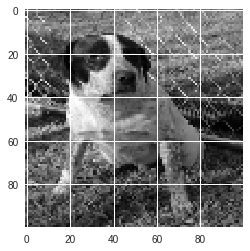

In [15]:
# example
plt.imshow(training_data[0][0], cmap='gray')  # graph it
plt.show()  # display!

In [16]:
print(training_data[0][0])
print(training_data[0][0].shape)

[[ 94 104  95 ... 122 100 111]
 [102 127 106 ... 153 153 134]
 [ 73  95 104 ... 115 154 143]
 ...
 [ 64  90  82 ...  24 106 104]
 [ 80  96  24 ...  95  92 129]
 [ 32  47  69 ... 115  74  82]]
(100, 100)


In [0]:
# Random Shuffling
import random

random.shuffle(training_data)

In [0]:
# X, Y Label split
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
# Save to a file
import pickle

pickle_out = open(DATA_PATH+"M2_1_X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(DATA_PATH+"M2_1_y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 2. CNN Prediction
- Read Training FIle
- Build Model
- Train Model
- Predict Model

In [0]:
# Read training file
import pickle

pickle_in = open(DATA_PATH+"M2_1_X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open(DATA_PATH+"M2_1_y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
X = X/255.0

TRAIN_RATIO = 0.8

X_train = X[:int(len(X)*TRAIN_RATIO)]
y_train = y[:int(len(y)*TRAIN_RATIO)]

X_test = X[int(len(X)*TRAIN_RATIO):]
y_test = y[int(len(y)*TRAIN_RATIO):]

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=64, epochs=30, validation_split=0.3)

Train on 3080 samples, validate on 1321 samples
Epoch 1/30
3080/3080 [==============================] - 20s 6ms/step - loss: 0.9164 - acc: 0.5438 - val_loss: 0.6826 - val_acc: 0.5958
Epoch 2/30
3080/3080 [==============================] - 12s 4ms/step - loss: 0.6642 - acc: 0.5942 - val_loss: 0.6569 - val_acc: 0.6018
Epoch 3/30
3080/3080 [==============================] - 12s 4ms/step - loss: 0.6447 - acc: 0.6289 - val_loss: 0.6486 - val_acc: 0.6101
Epoch 4/30
3080/3080 [==============================] - 12s 4ms/step - loss: 0.6083 - acc: 0.6705 - val_loss: 0.6990 - val_acc: 0.6427
Epoch 5/30
3080/3080 [==============================] - 12s 4ms/step - loss: 0.5760 - acc: 0.7075 - val_loss: 0.6343 - val_acc: 0.6457
Epoch 6/30
3080/3080 [==============================] - 13s 4ms/step - loss: 0.5429 - acc: 0.7292 - val_loss: 0.6638 - val_acc: 0.6525
Epoch 7/30
3080/3080 [==============================] - 12s 4ms/step - loss: 0.5471 - acc: 0.7269 - val_loss: 0.6436 - val_acc: 0.6495
Epoch 8

In [23]:
score = model.evaluate(X_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.571962573222958
Test accuracy: 0.651226158362968
